# Uber Supply - Demand Gap

                          Submission By:- ANUPAM MISHRA  ( ML )

## 1. Import Required Library

In [1]:
#Let us import some of the library which is being used to to this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## 2. Data Sourcing Cleaning and Preparation
###  Read the uber data, inspect, clean and manipulate the data .



In [2]:
#Let us import the given data set of uber 
Uber = pd.read_csv("C:/Users/Anupam Mishra/Downloads/Uber Request Data.csv")
Uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [3]:
 # As we can see that the date in the request timestamp and drop timestamp are in different format
# Convert the date fields to date time since it is possible for the 
# day and month to be interchanged.
Uber['Request timestamp']=Uber['Request timestamp'].astype(str)
Uber['Request timestamp']=Uber['Request timestamp'].str.replace('/','-')
Uber['Request timestamp']=pd.to_datetime(Uber['Request timestamp'],dayfirst=True)
Uber['Drop timestamp']=pd.to_datetime(Uber['Drop timestamp'],dayfirst=True)
Uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


 Converted Column Request timestamp and Drop timestamp to Date Time and created derived variables

In [4]:
#Let us inspect the dataset
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [5]:
# checking the shape i.e row and column
Uber.shape

(6745, 6)

In [6]:
# some import things like mean max check by describe
Uber.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [7]:
#checking for null values column wise
Uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
# for checking duplicated rows based on request id
dup_chk = Uber["Request id"].duplicated()
dup_chk.sum()

0

In [9]:
#Let us check the null values of Drivers id
Uber[np.isnan(Uber['Driver id'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT
4096,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT
4097,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT
4098,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT
4099,7,Airport,NaN,No Cars Available,2016-07-11 00:30:00,NaT
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


As we can see the Driver id has NaN value when status = No Cars available



In [10]:
#Imputing Driver id with 0 value to remove NaN
Uber['Driver id'] = Uber[['Driver id']].fillna(0).astype(int)
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          6745 non-null   int32         
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 289.9+ KB


In [11]:
# Let us see the  NaT values of Drop timestamp
Uber[np.isnat(Uber['Drop timestamp'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,1,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,1,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,1,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,2,Cancelled,2016-07-12 19:14:00,NaT
...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,NaT


In [12]:
#Droping Drop timestamp column as we will not be using it for analysis.
Uber = Uber.drop(['Drop timestamp'], axis=1) 

In [13]:
#Checking null value percetage in each column

round(100*(Uber.isnull().sum()/len(Uber.index)), 2)

Request id           0.0
Pickup point         0.0
Driver id            0.0
Status               0.0
Request timestamp    0.0
dtype: float64

In [14]:
# Create a new column called request hour from the request timestamp column
#to identify the hours where supply demand gap exists
Uber['Request hour'] = Uber['Request timestamp'].apply(lambda x: x.strftime('%H'))
Uber['Request hour'] =  Uber['Request hour'].astype(int)
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8


-  Let Us Binning Into Time Categories 

In [15]:
# Creating a new column from the hours column by categorizing it into
# 4:00 Am to 7:59Am is Early morning
# 8:00 AM to 11:59 is Morning
# 12:00 to 15:59 is Afternoon
# 16:00 to 19:59 is Evening
# 20:00 to 23:59 is Night
# 24:00 to 3:59 AM is late Night

def timeslot(x):
    if x >= 4 and x < 8:
        return 'Early Morning'
    elif x >= 8 and x < 12:
        return 'Morning'
    elif x >= 12 and x < 16:
        return 'Afternoon'
    elif x >= 16 and x < 20:
        return 'Evening'
    elif x >= 20:
        return 'Night'
    elif x >= 0 and x < 4:
        return 'Late Night'
    
Uber['Request timeslot'] = Uber['Request hour'].apply(timeslot)
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning


In [16]:
# Creatig a new column Request day by fetching the day of week from the request timestamp column
Uber['Request dayofweek'] = Uber['Request timestamp'].dt.day_name()
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request dayofweek
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday


##  3. Data Analysis

### Univariate Analysis

#### Analyse the number of requests for all Trip Status ( Trip Completed, Cancelled and No Cars Available)

Text(-2.5749999999999957, 0.5, 'Request Frequency')

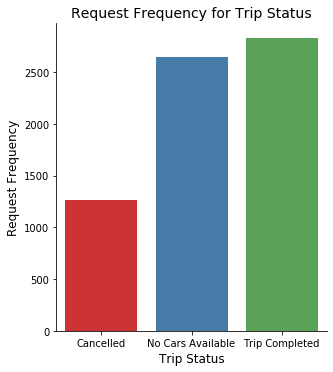

In [17]:

order_status = Uber['Status'].sort_values(ascending = True).unique().tolist()
plot = sns.catplot(x="Status", kind="count", data=Uber, palette="Set1", aspect= .9, order=order_status);

plt.title('Request Frequency for Trip Status', fontsize = 14)
plt.xlabel("Trip Status", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)



- Above analysis we can easily see that  "No cars available" status is more frequent than the number of trips "cancelled" status.<br/>


#### Let us see the percentage of above graph with pie chart

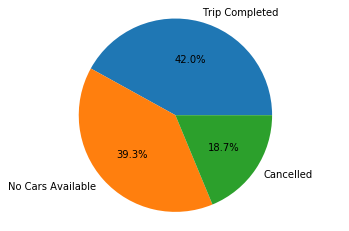

In [18]:

#Status distribution in pie Chart
Uber.loc[(Uber.Status =="Trip Completed"),'TripComp'] =1
Uber.loc[(Uber.Status =="No Cars Available"),'NoCars'] =1
Uber.loc[(Uber.Status =="Cancelled"),'Cancel'] =1


labels = ['Trip Completed', 'No Cars Available', 'Cancelled']
sizes = [Uber['TripComp'].value_counts()[1],
         Uber['NoCars'].value_counts()[1],
         Uber['Cancel'].value_counts()[1],
         ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()

- As Mention earlier that percentage of no cars available is more as compared to cancelled.

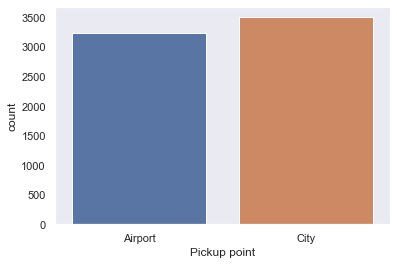

In [19]:
#Ploting a countplot of pickup point 
sns.set(style="dark")
ax = sns.countplot(x="Pickup point", data=Uber)
plt.show()



- Above analysis shows that there are 2 pickup points i.e Airport And City are almost same,however city have slightly more requests than airport.


### Bivariate Analysis

In [20]:
# Analyze Status and Pickup point.
Uber.groupby(['Status','Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

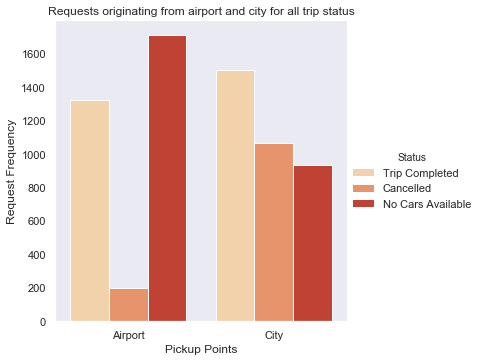

In [21]:
#Identify the number of requests for trips originating from airport and city for all the 3 trip status.
plot = sns.catplot(x="Pickup point", hue="Status", palette='OrRd', kind="count", data=Uber);

plt.title('Requests originating from airport and city for all trip status', fontsize = 12)
plt.xlabel("Pickup Points", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)
plt.show()

- Above plot tells us that<br>
    1) **No Cars Available** status count is very high at Airport.<br>
    2) Cancelled status count is more in city. 

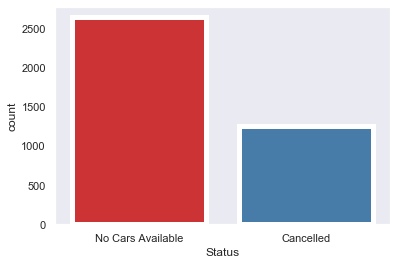

In [22]:
#Plot Showing frequency of requests that get cancelled or show 'No cars Available'

sns.countplot(x="Status", palette="Set1", linewidth=5, data=Uber[Uber.Status != 'Trip Completed'], 
              order = ['No Cars Available','Cancelled'])

 As clearly seen that the status of **No Cars available** is more than the **Cancelled** .

### Derived Metrics and Analysis

Let Us see the status of cars vs Days of week

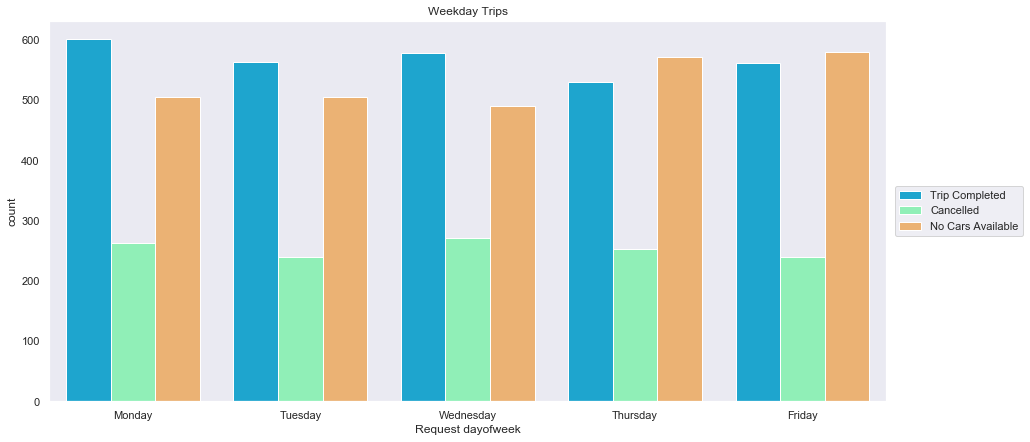

In [23]:
# Status for each day
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Weekday Trips")
ax = sns.countplot(x="Request dayofweek",hue='Status',data=Uber,palette='rainbow')
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')


As you see that the cancelled trip is approxmatly same.

#### Let as see the number of request count per days

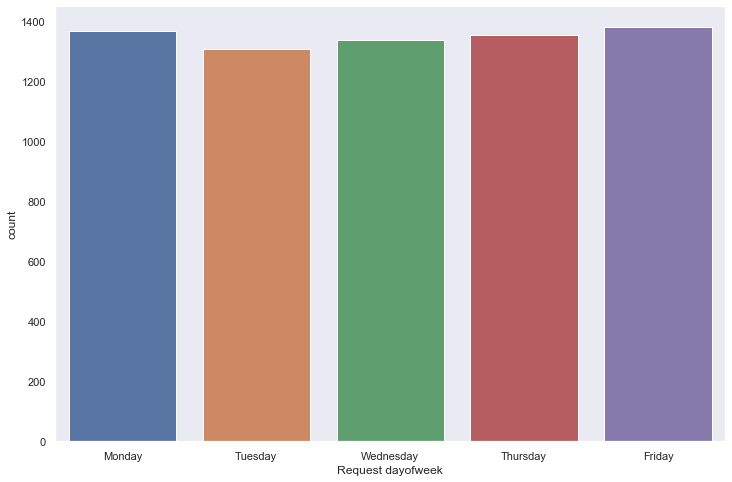

In [24]:
#looking to find the request count vs daysof week 
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Request dayofweek', data=Uber)
plt.show()

It can be see that there isn't much difference in request on weekdays

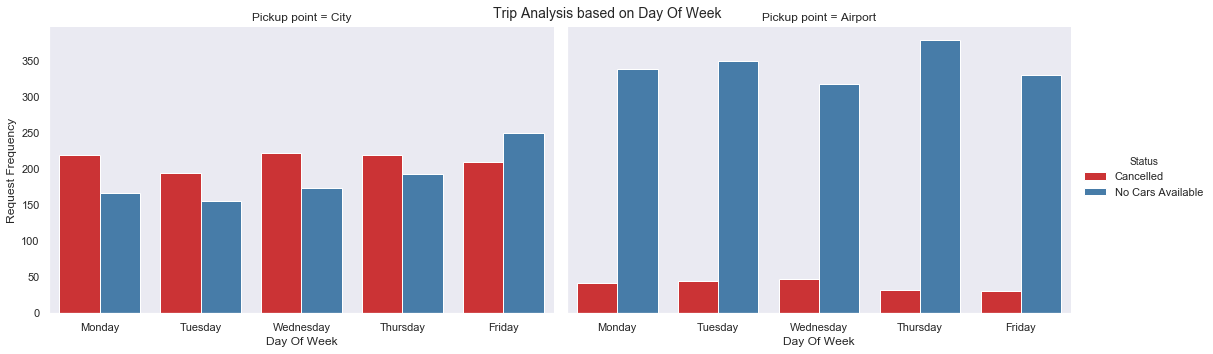

In [25]:
# Let us see the status vs days of week again each pick up point.
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday']

filter_trip_status_df = Uber[(Uber['Status'] == 'Cancelled') | (Uber['Status'] == 'No Cars Available')]

plot = sns.catplot(x="Request dayofweek", col= 'Pickup point', hue="Status", palette='Set1', kind="count", 
                   data=filter_trip_status_df, aspect=1.5, order=order_days);

plot.fig.suptitle('Trip Analysis based on Day Of Week', fontsize=14)
plot.set_xlabels('Day Of Week', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)
plt.show()

Following things can be seen  from the above plots
- 1) For trips from city airport, except for friday, cancelled trips are more for all other days of week
- 2) For trips from airport city, for all days there are more number of No Cars Available

#### Now Let us see the request per hour.

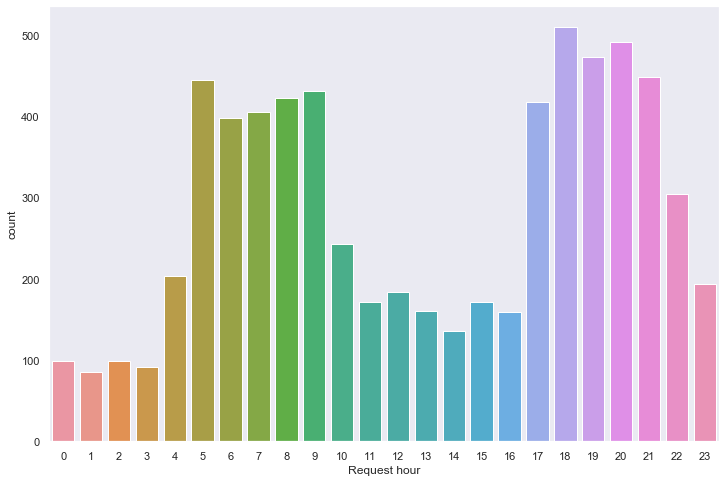

In [26]:
#looking for insight in request hour
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='Request hour', data=Uber)
plt.show()

we can see that the in the early hours and late hours the no of request is much more.

###### Let us check them separatly ( Airport & City )

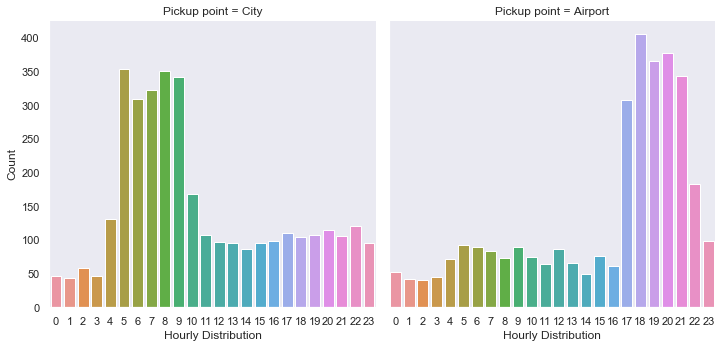

In [27]:
# Hourly distribution by Pickup point

g=sns.catplot(x="Request hour",col="Pickup point",kind="count",col_order = ['City','Airport'],data=Uber)
g.set_axis_labels("Hourly Distribution" ,"Count")

#### - Let us plot no of request per hour by status.

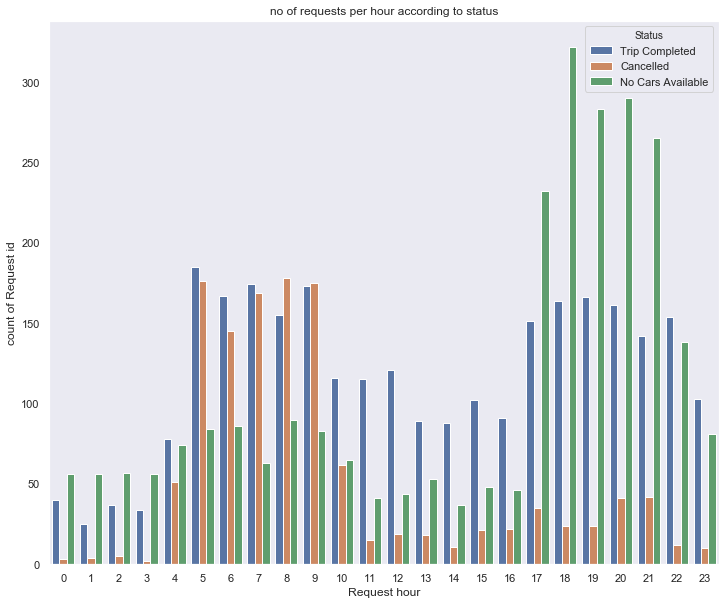

In [28]:
#now plotting for requests per hour according to status 
plt.figure(figsize=(12,10))
sns.barplot(x='Request hour',y='Request id',hue='Status',data=Uber,estimator=len)
plt.title("no of requests per hour according to status")
plt.ylabel("count of Request id")
plt.show()

#####     Now plot  a graph of request per hour of city & Airport

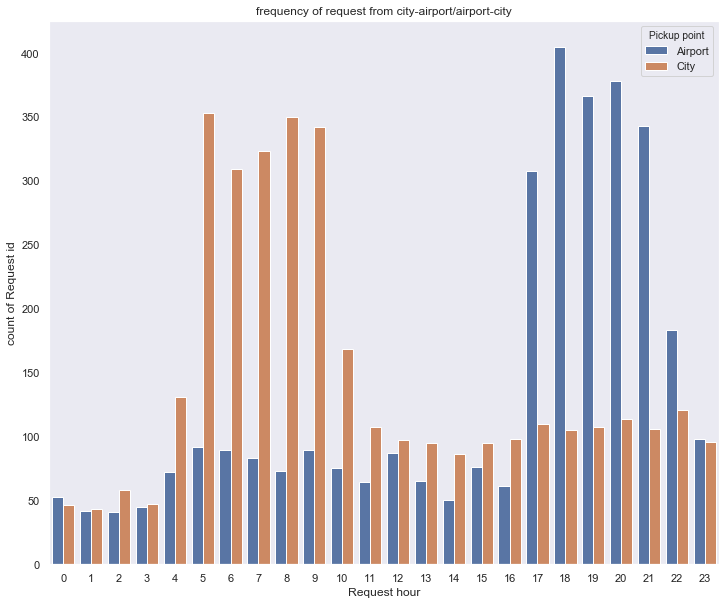

In [29]:
#plot of no. of requests from city to airport/airport to city
plt.figure(figsize=(12,10))
sns.barplot(x='Request hour', y='Request id', hue='Pickup point',data=Uber, estimator=len)
plt.title("frequency of request from city-airport/airport-city")
plt.ylabel("count of Request id")
plt.show()


- As we can see in the above plot that most of the people requests for the car in the **Morning** or **Evening**.
- **Morning** and **Evening** are the time when there is rush.



#### Now ploting the request by timeslot as we diffrenciate earlier.

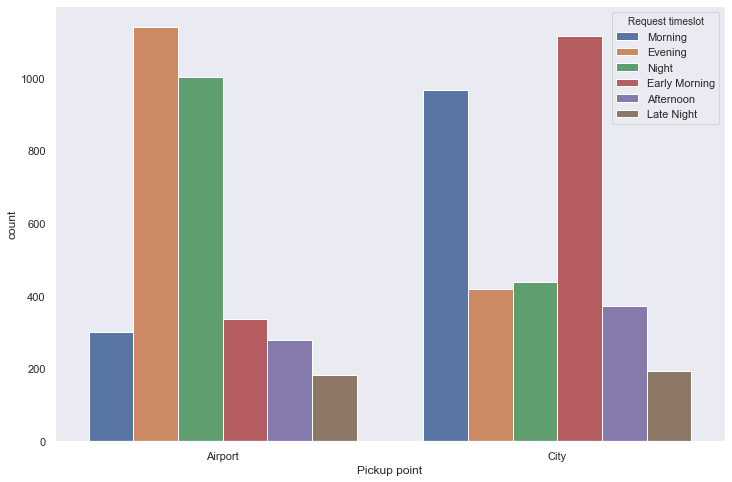

In [30]:
#segmenting pickup point over time slot
plt.figure(num=None, figsize=(12, 8))
sns.countplot(x='Pickup point', hue="Request timeslot", data=Uber)
plt.show()



From above plot it can be see that **Airport** has higher request in **Evening**
and **City** has higher request in the **Morning**.

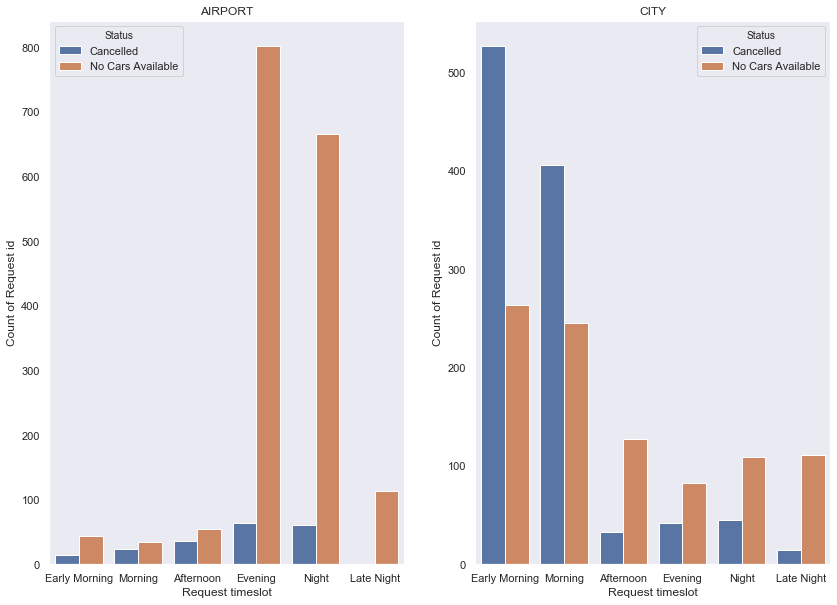

In [31]:
#plots of frquency of request

order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.barplot(x='Request timeslot',y='Request id',hue='Status',data=Uber[(Uber['Pickup point']=='Airport')&
(Uber['Status']!='Trip Completed')],estimator=len,order = order_timeslot)
plt.title("AIRPORT")
plt.ylabel("Count of Request id")


plt.subplot(1,2,2)
sns.barplot(x='Request timeslot',y='Request id',hue='Status',data=Uber[(Uber['Pickup point']=='City')&
(Uber['Status']!='Trip Completed')],estimator=len, order = order_timeslot)
plt.title("CITY")
plt.ylabel("Count of Request id")
plt.show()

The above plot shows that <br>
- The highest cancellation is in early morning.<br>
- The highest no cars available is in evening & night.

Now checking with the trip status

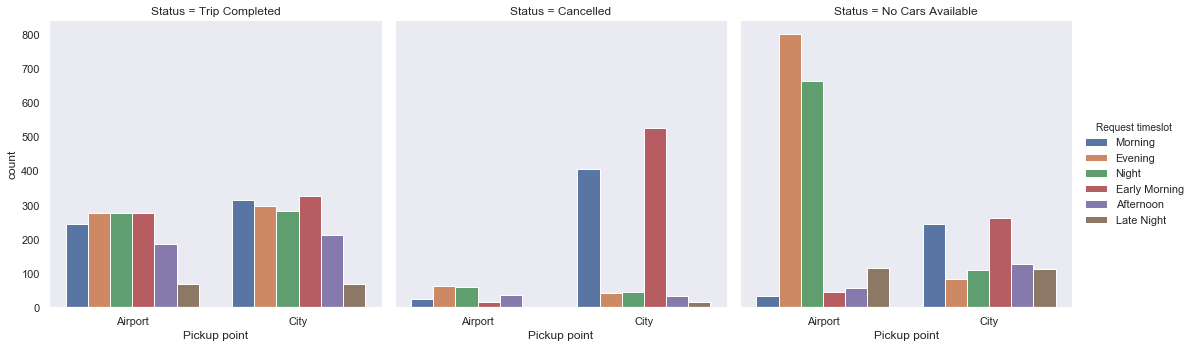

In [32]:
#segmenting the timeslot vs both Status and pickup point 

sns.catplot(x='Pickup point',col="Status", hue = 'Request timeslot',data=Uber ,kind="count")
plt.show()



From the below plot it is evident that:
- Airport requests during the evening slot(during which there is high airport request rate)there are no cars available
- Most city requests get cancelled in the morning slot(during which there is high city request rate) 

#### Analyse the request frequency for Non Available Cars from airport & city for all timeslots.

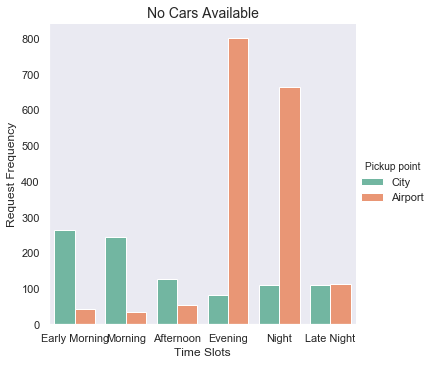

In [33]:
no_cars_available = Uber[(Uber['Status'] == 'No Cars Available')]

plot = sns.catplot(x="Request timeslot", hue="Pickup point", kind="count", palette="Set2", 
            data=no_cars_available, order = order_timeslot)

plt.title('No Cars Available', fontsize = 14)
plt.ylabel('Request Frequency', fontsize = 12)
plt.xlabel('Time Slots', fontsize = 12)

plt.show()

#### Analyse the request frequency of cars for Cancelled Trips from airport & city for all timeslots.

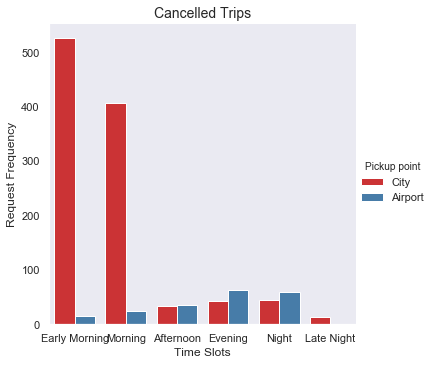

In [34]:
# The order of display of time slot
order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

cancelled = Uber[(Uber['Status'] == 'Cancelled')]

plot = sns.catplot(x="Request timeslot", hue="Pickup point", kind="count", palette="Set1", 
            data=cancelled, order = order_timeslot);
plt.title('Cancelled Trips', fontsize = 14)
plt.ylabel("Request Frequency", fontsize = 12)
plt.xlabel("Time Slots", fontsize = 12)

plt.show()

From the above graph it can be seen that maximum number of cars not available are from airport - city, during the evening hours followed by night.

#### Identify the approximate hour when more cars are unavailable during the identified timeslots and pickup point.

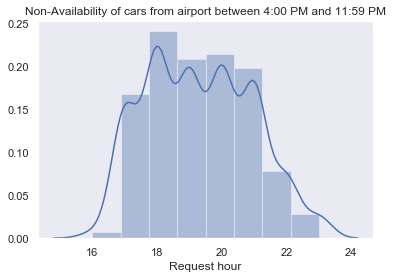

In [35]:
evening_unavailable_cars = no_cars_available[(((no_cars_available['Request timeslot'] == 'Evening') 
                                                     | (no_cars_available['Request timeslot'] == 'Night')) 
                                                    & (no_cars_available['Pickup point'] == 'Airport'))]
plt.title('Non-Availability of cars from airport between 4:00 PM and 11:59 PM') 
sns.distplot(evening_unavailable_cars['Request hour'], bins=8) 
plt.show()

The above plot shows that more number of cars are unavailable around 6:00 PM followed by 8:00 PM, 7:00 PM, 9:00 PM

Hence, the most pressing problem is as follows :
    - More cars are cancelled from city - airport, for timeslots between 4:00 AM and 11:59 AM
    - More cars are unavailable from airport - city, for timeslots between 4:00 PM and 11:59 PM
    
 ##### Supply demand gap can be calculated as follows :
    - Demand = Number of cars requested
    - Supply = Cars that completed the trips.
    - Supply Demand Gap = Cancelled cars plus unavailable cars

In [36]:
#creating demand column
Uber.loc[(Uber.Status == 'Trip Completed') | (Uber.Status == 'Cancelled')| (Uber.Status == 'No Cars Available'), 'demand'] = 'Demand' 

In [37]:
#creating supply column
Uber.loc[(Uber.Status == 'Trip Completed'), 'supply'] = 'Supply'

In [38]:
#creating gap column
Uber.loc[(Uber.Status == 'Cancelled')| (Uber.Status == 'No Cars Available'), 'gap'] = 'Gap' 

In [39]:
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request dayofweek,TripComp,NoCars,Cancel,demand,supply,gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,Demand,Supply,NaN
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,Demand,Supply,NaN
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,Demand,Supply,NaN


In [40]:
Uber_SupplyandDemand = pd.DataFrame([Uber.demand,Uber.supply,Uber.gap]).transpose()
Uber_SupplyandDemand.head()

,demand,supply,gap
0,Demand,Supply,NaN
1,Demand,Supply,NaN
2,Demand,Supply,NaN
3,Demand,Supply,NaN
4,Demand,Supply,NaN


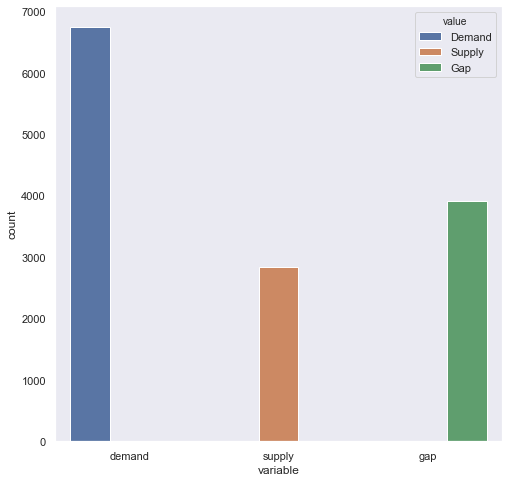

In [41]:
# plotting demand, supply and gap count
plt.figure(num=None, figsize=(8, 8), facecolor='w', edgecolor='k')
sns.countplot(x="variable",hue="value", data=pd.melt(Uber_SupplyandDemand))
plt.show()

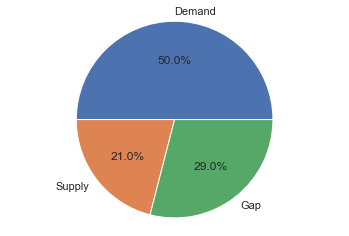

In [42]:
#percentage  distribution in pie Chart
Uber.loc[(Uber.Status == 'Trip Completed') | (Uber.Status == 'Cancelled')| (Uber.Status == 'No Cars Available'), 'demand'] =1
Uber.loc[(Uber.Status == 'Trip Completed'), 'supply']=1
Uber.loc[(Uber.Status == 'Cancelled')| (Uber.Status == 'No Cars Available'), 'gap'] =1


labels = ['Demand', 'Supply', 'Gap']
sizes = [Uber['demand'].value_counts()[1],
         Uber['supply'].value_counts()[1],
         Uber['gap'].value_counts()[1],
         ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()

In [43]:
# Create a new column to determine supply vs supply demand gap
# function returns the value Supply or Supply Demand Gap based on the trip status

def setSupplyorSupplyDemandGap(x):
    if x == 'Trip Completed':
        return 'Supply'
    else:       
        return 'Supply demand gap'
    
Uber['Supply demand gap'] = Uber['Status'].apply(setSupplyorSupplyDemandGap)
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request dayofweek,TripComp,NoCars,Cancel,demand,supply,gap,Supply demand gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,1,1,NaN,Supply
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,1,1,NaN,Supply
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,1,1,NaN,Supply
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,1,1,NaN,Supply
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,1,1,NaN,Supply


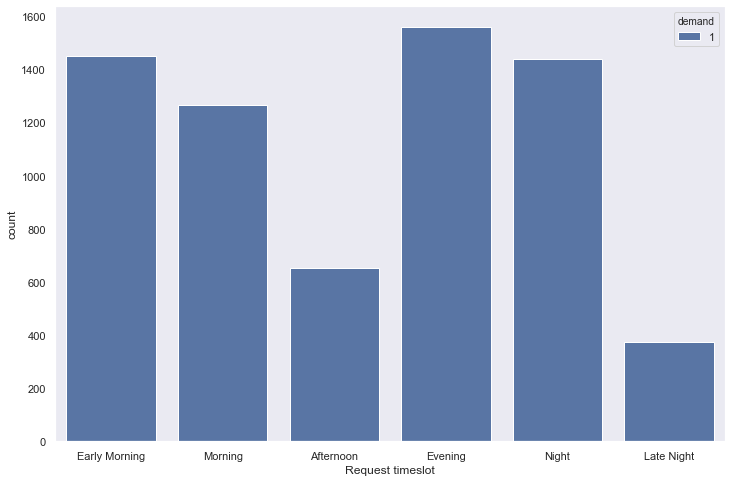

In [44]:
#segmenting demand across the request time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(hue='demand',x="Request timeslot", data=Uber,order=order_timeslot)
plt.show()

As seen above that the demand is high in evening ,early morning, morning & night. 
We cannot say at which pickup up point the demand is high so
###### let us plot Demand at each pickup point. i.e Airport & City

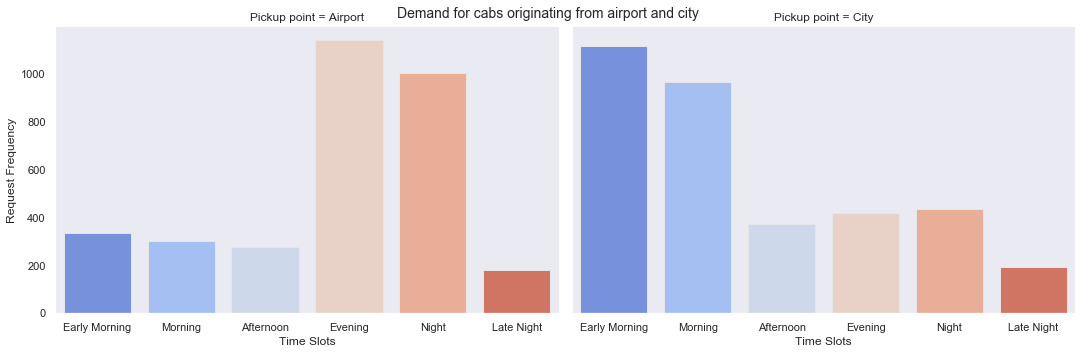

In [45]:
plot = sns.catplot(x='Request timeslot', col="Pickup point", kind="count", palette="coolwarm", edgecolor=".9", aspect = 1.5, 
          data=Uber, order = order_timeslot)

plot.fig.suptitle('Demand for cabs originating from airport and city', fontsize=14)
plot.set_xlabels('Time Slots', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)
plt.show()

From the above plots it is clear that :  

    - For airport pickups, demand is more during the evening and night hours
    - For city pickups, demand is more during the early morning and morning

#### Let us find the time slots when the highest supply demand gap exists

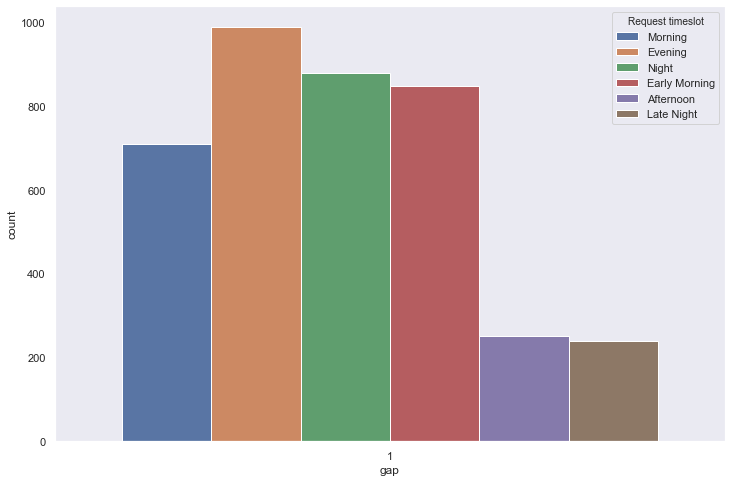

In [46]:
# Checking the gap at each time slot.
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='gap',hue="Request timeslot", data=Uber)
total = len(Uber['gap'])

plt.show()



- Above graph show that the demand  in early Morning , evening and night since it is the rush time.

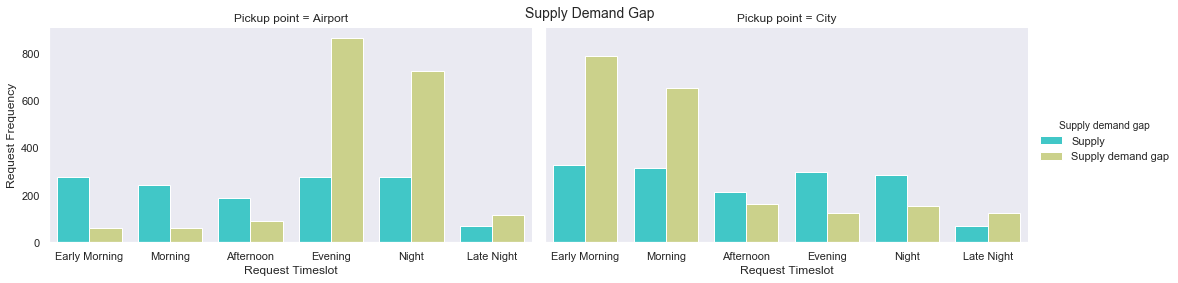

In [47]:
# Let us Check the Supply demand gap or gap at both pickup point.
plot = sns.catplot(x="Request timeslot", hue="Supply demand gap", col = 'Pickup point', data=Uber, palette='rainbow', 
            kind="count", height=4, aspect = 1.8, order = order_timeslot);

plot.fig.suptitle('Supply Demand Gap', fontsize=14)
plot.set_xlabels('Request Timeslot', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)
plt.show()

###### The above plot shows the following :
    
- The gap is more in the evening and night for pickup point Airport.
- The gap is more in the early morning  and morning  for pickup point City.

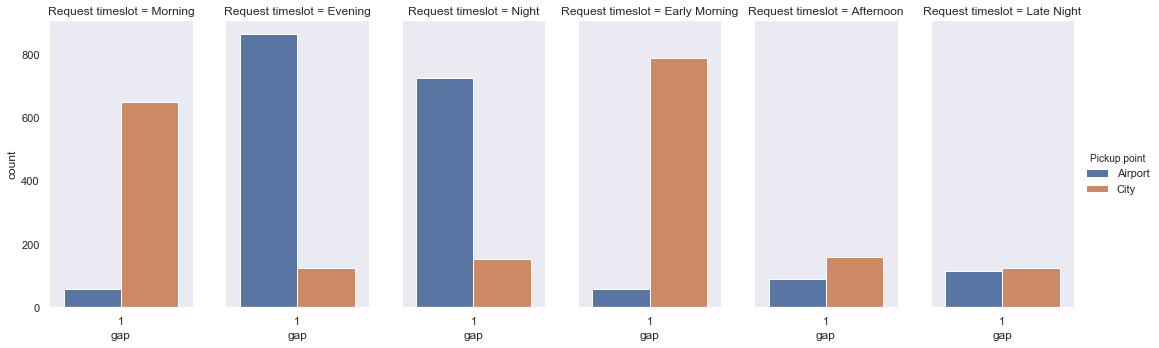

In [48]:
# Checking the gap at every timeslot vs both pickup point.
sns.catplot(x='gap',col="Request timeslot", hue = 'Pickup point',data=Uber ,kind="count", height=5,aspect= 0.5,
            ci=85)
plt.show()


<Figure size 936x360 with 0 Axes>

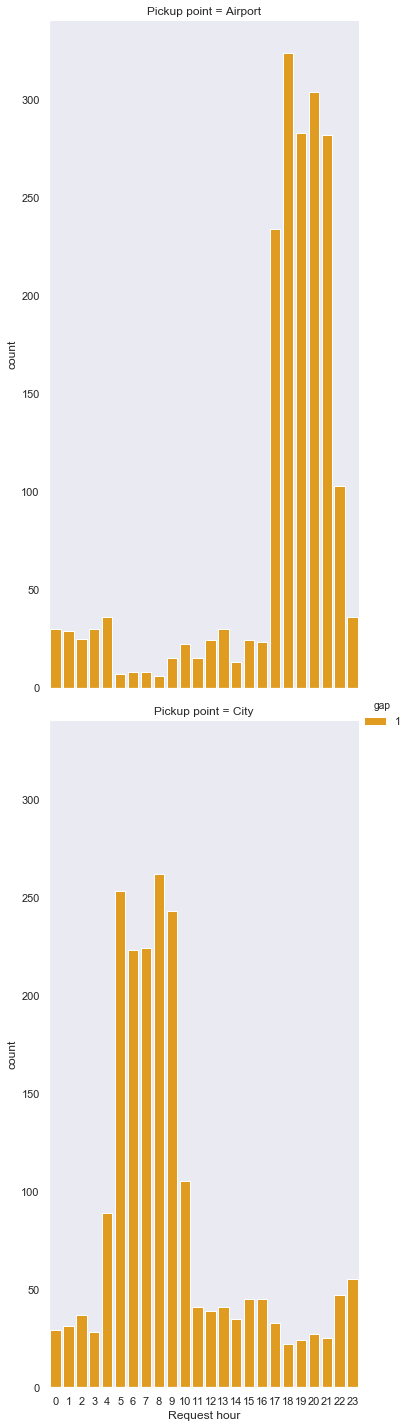

In [49]:
# Checking the gap at every hour vs both the pickup point
plt.figure(num=None, figsize=(13, 5), facecolor='w', edgecolor='k')
sns.catplot(x='Request hour',col="Pickup point", hue = 'gap',data=Uber ,kind="count", height=10,aspect= 0.5,
            ci=85,col_wrap=1,palette=sns.color_palette(['orange']))
plt.show()

#### Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

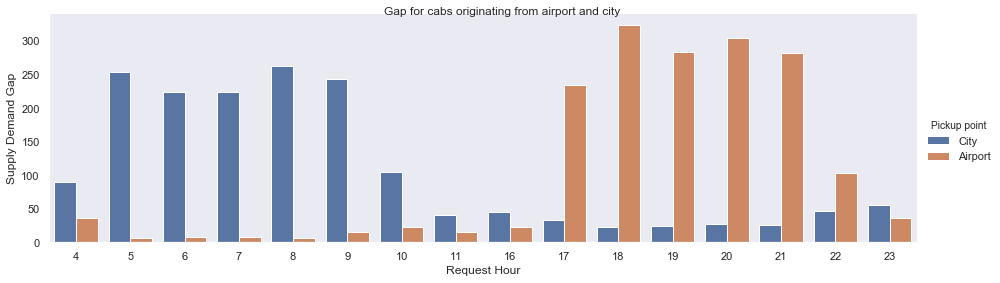

In [50]:
# filter based on the request time slots and supply demand gap

most_severe_gap = Uber[((Uber['Request timeslot'] == 'Evening') |
                           (Uber['Request timeslot'] == 'Night') | 
                           (Uber['Request timeslot'] == 'Early Morning') | 
                           (Uber['Request timeslot'] == 'Morning')) & 
                          (Uber['Supply demand gap'] == 'Supply demand gap')] 

plot = sns.catplot(x="Request hour", hue="Pickup point", data=most_severe_gap, kind="count", 
            height=4, aspect = 3.2)

plot.fig.suptitle('Gap for cabs originating from airport and city', fontsize=12)
plot.set_xlabels('Request Hour', fontsize=12)
plot.set_ylabels('Supply Demand Gap', fontsize=12)
plt.show()

The above plot shows that the most severe supply demand gap.

### Observation so far:

The problematic status are 'cancelled' and 'no cars available' as it leads to potential loss of revenue. We observed the hightest value of:

    Status: "No car available"
    Where is it happening: Airport - i.e airport to city
    When is it happening: Evening 

    Status: "Cancelled"
    Where is it happening: City - i.e city to airport
    When is it happening: Morning

The above points are in sync with highest request rates coming from morning and evening slot.

To make our analayse our observation so far, we further looked into the 'gap'. This again is in sync with above observations.
The 'gap' which exists are the hightest:
 
    Status: "No car available"
    Where is it happening: Airport - i.e airport to city
    When is it happening: Evening 

    Status: "Cancelled"
    Where is it happening: City - i.e city to airport
    When is it happening: Morning. 

And vice versa is not true:

       1. Morning hours :There is no high demand for cabs from airport to city 
       2. Evening hours: There is no high demand for cabs from city to airport
       
This tells us that there are more outbound flights in the morning and inbound flights in the evening.       
### The reason for the issue:

    In the morning hours: Though there is high demand for cabs from city to airport, the vice versa is not true.
                          Hence the driver tends to 'cancel' the request as getting a return trip from airport 
                          to city would be tough.
    
    In the evening hours: Though there is high demand for cabs from airport to city, the vice versa is not true.
                          Hence 'no cars available' in the airport is the hightest in the evening.
### Possible suggestions to fill the supply demand gap:

1. Provide incentives for airport trips during peak time.
2. Assigning few extra cabs specially to the airport trips.
3. Fixing a base price for drivers idle time in the airport or to come back to the city without any passenger.
4. Impose penalty for cancellation of requests by the drivers. Set a threshold for the maximum cancellation per day.
5. Promote continuous trip to airport with incentives.
6. Promote advance booking to airports and at the same time keeping drivers updated will the flight schedule with help them plan their work and they can accept the request as per their work plan.

    
        